# **Identifying Brain Stroke Patients**
**Data Analysis on Brain Stroke Data set**

Team

*   Arshdeep Chandhok - 300381056
*   Jake Tang - 300370895
*   Leshan Kuruppuarachchi - 300363077
*   Tushar Shandilya - 300378305

[Data Source](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset)



In [1]:
!pip install kmodes
!pip install imbalanced-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
#import libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler



execute following step only when running using jupyter notebook

In [ ]:
#read the data set
data_df = pd.read_csv('brain_stroke.csv')

execute following step only when running using google colab

Note: Create a folder named Data Analytics in google drive and copy the csv there

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#read the data set
data_df = pd.read_csv('/content/drive/My Drive/Data Analytics/brain_stroke.csv')

Mounted at /content/drive


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#check for duplicates
duplicates = data_df.duplicated()
duplicates.value_counts()

False    4981
Name: count, dtype: int64

In [ ]:
#check for missing values
missing_values = data_df.isna()
missing_count = missing_values.sum()

print("\nCount of missing values in each column:")
print(missing_count)


Count of missing values in each column:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
data_df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [ ]:
data_df["stroke"].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

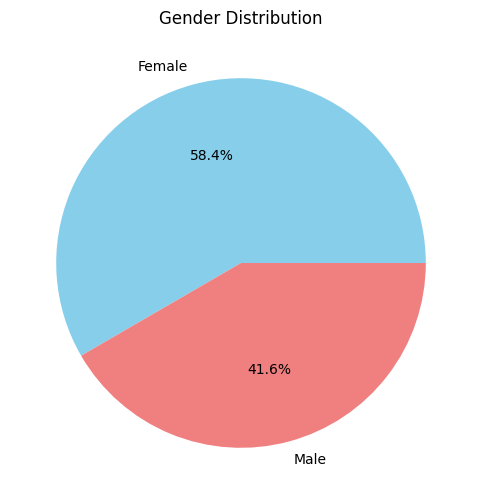

In [ ]:
import seaborn as sns

# Count the occurrences of each gender
gender_counts = data_df['gender'].value_counts()

# Create a pie chart for gender distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.show()

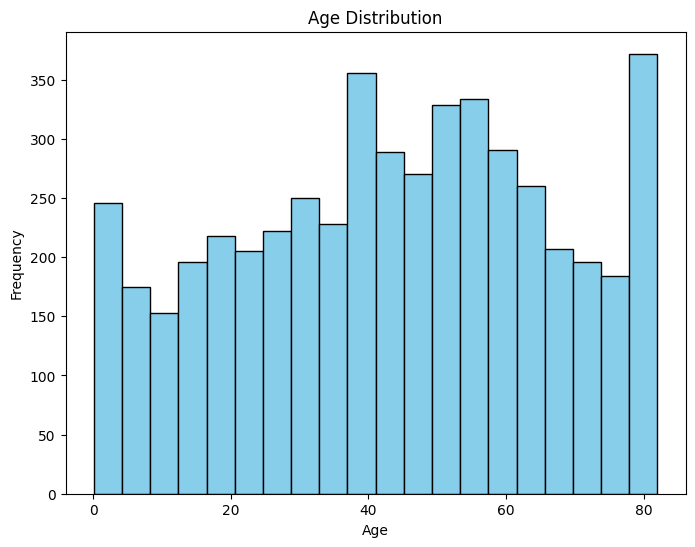

In [ ]:
# Create a histogram for age distribution
plt.figure(figsize=(8, 6))
plt.hist(data_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

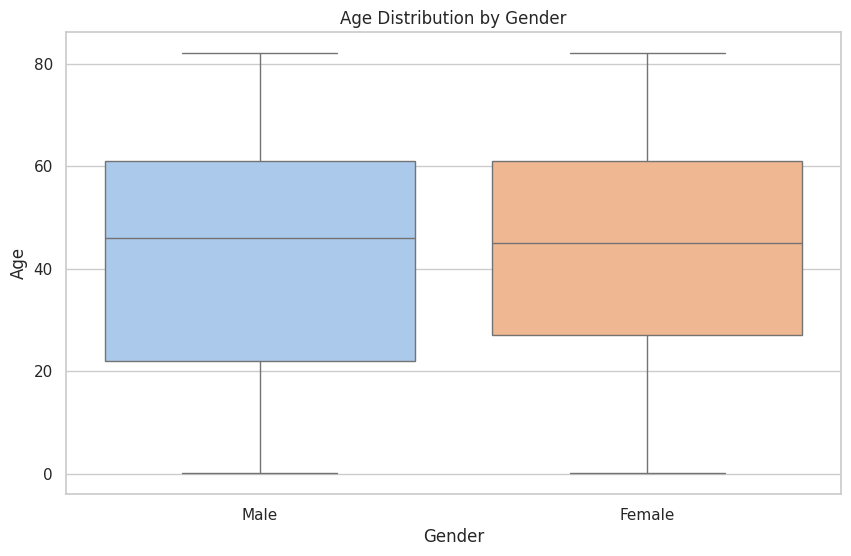

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for age distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="age", data=data_df, palette="pastel", hue="gender", legend=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

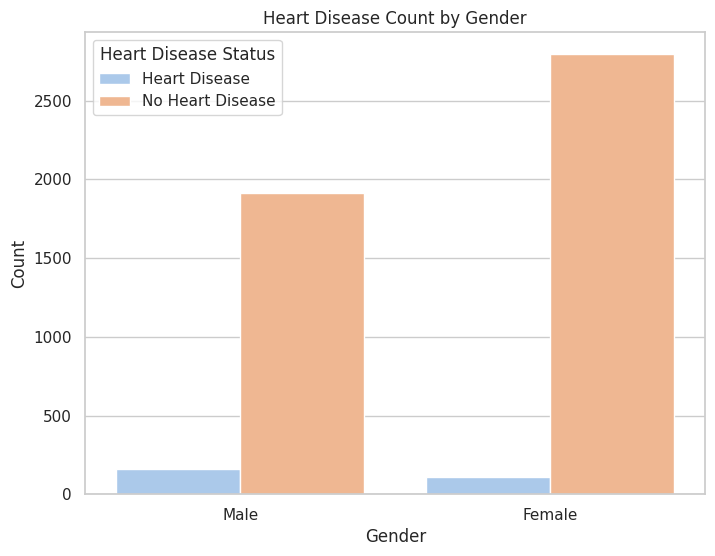

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Map the heart_disease values to meaningful labels
data_df['heart_disease_status'] = data_df['heart_disease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# Create a bar plot showing the count of heart disease by gender
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="heart_disease_status", data=data_df, palette="pastel")
plt.title("Heart Disease Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Disease Status")
plt.show()

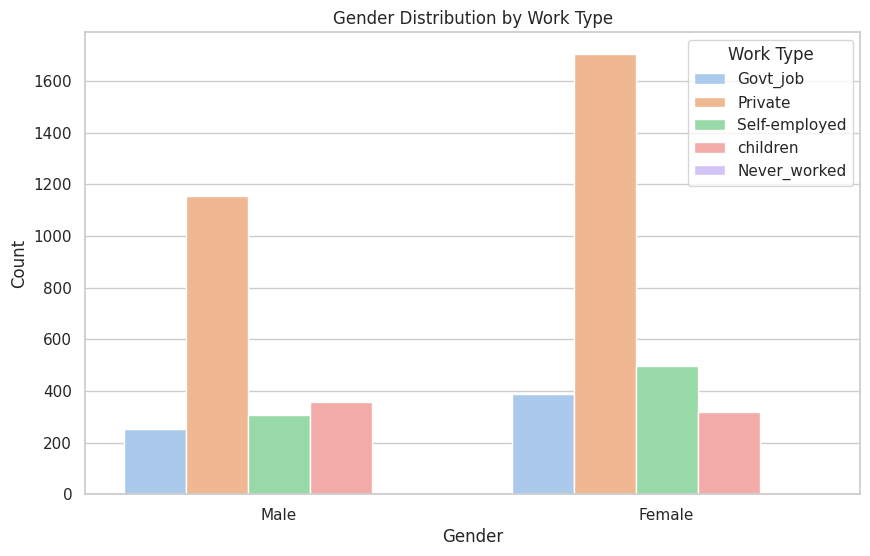

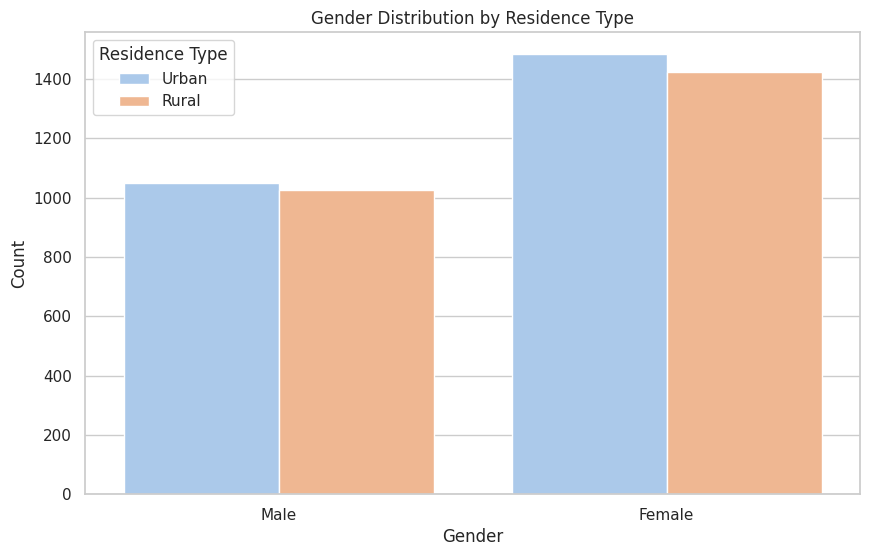

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grouped bar plot for gender, work type, and residence type
plt.figure(figsize=(10, 6))
sns.countplot(x="gender", hue="work_type", data=data_df, palette="pastel", hue_order=["Govt_job", "Private", "Self-employed", "children", "Never_worked"])
plt.title("Gender Distribution by Work Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Work Type")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="gender", hue="Residence_type", data=data_df, palette="pastel")
plt.title("Gender Distribution by Residence Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Residence Type")
plt.show()

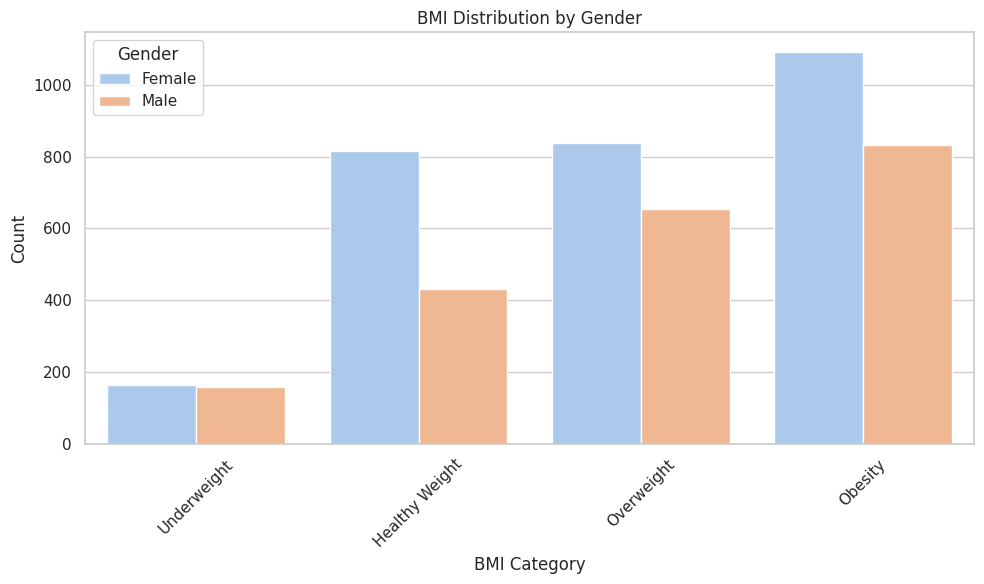

In [ ]:
# Define BMI ranges and corresponding labels
bmi_ranges = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Categorize BMI values into ranges
data_df['bmi_category'] = pd.cut(data_df['bmi'], bins=[0, 18.5, 25, 30, float('inf')], labels=bmi_ranges, right=False)

# Group data by gender and BMI category and count occurrences
grouped_data = data_df.groupby(['gender', 'bmi_category']).size().reset_index(name='count')

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_category', y='count', hue='gender', data=grouped_data, palette='pastel')
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

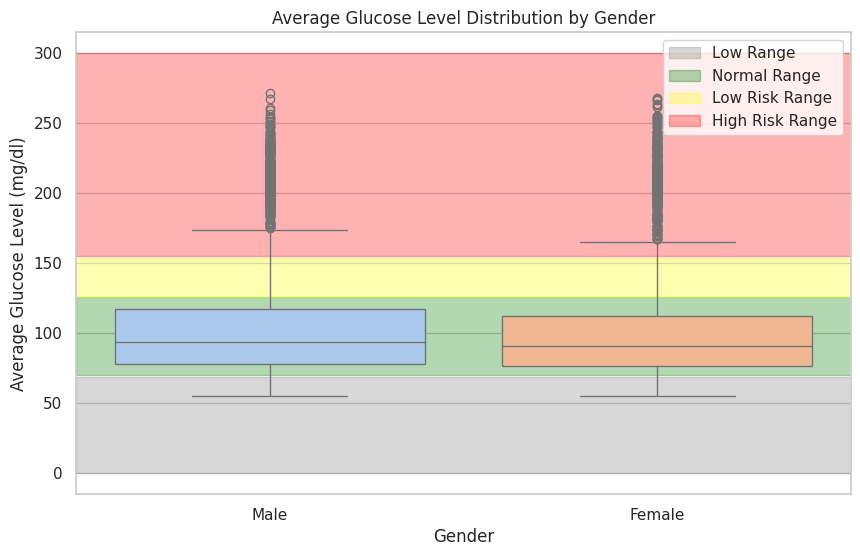

In [ ]:
# Define the normal and abnormal ranges for average glucose level
low_range = (0, 69)
normal_range = (70, 126)
abnormal_range = (126, 154)
critical_range = (155, 300)

# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot the box plot for average glucose level by gender
sns.boxplot(x="gender", y="avg_glucose_level", data=data_df, palette="pastel", hue="gender", legend=False)

# Highlight the normal and abnormal ranges
plt.axhspan(low_range[0], low_range[1], color='gray', alpha=0.3, label='Low Range')
plt.axhspan(normal_range[0], normal_range[1], color='green', alpha=0.3, label='Normal Range')
plt.axhspan(abnormal_range[0], abnormal_range[1], color='yellow', alpha=0.3, label='Low Risk Range')
plt.axhspan(critical_range[0], critical_range[1], color='red', alpha=0.3, label='High Risk Range')

# Set plot title and labels
plt.title("Average Glucose Level Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Glucose Level (mg/dl)")

# Show legend
plt.legend()

# Show the plot
plt.show()

# **Clustering**

**Note: not included in the presentation**

K-Mean clustering for numerical data

Unsupervized clustering

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df.select_dtypes(exclude='object'))
features_for_clustering = data_df.select_dtypes(exclude='object').columns
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
data_df['Cluster'] = clusters

# Visualize the clusters
# For simplicity, let's visualize the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


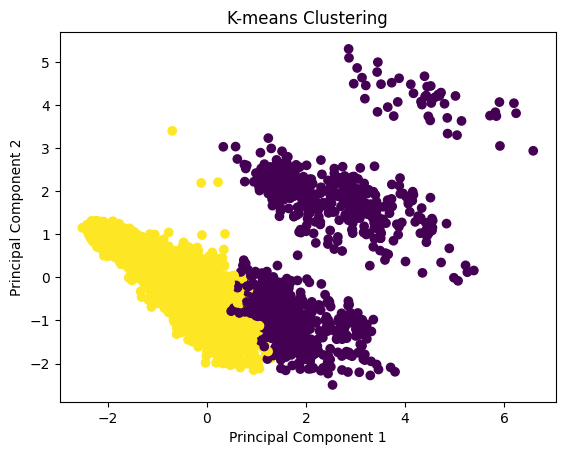

               age  hypertension  heart_disease  avg_glucose_level        bmi  \
Cluster                                                                         
0        64.111211      0.428700       0.245740          150.21426  31.768072   
1        37.452230      0.000259       0.000259           93.17537  27.555096   

           stroke  
Cluster            
0        0.220628  
1        0.000517  


In [ ]:
#plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

# You can further analyze and interpret the clusters based on their characteristics
cluster_means = data_df.groupby('Cluster')[features_for_clustering].mean()
print(cluster_means)


Supervized clustering

               age  hypertension  heart_disease  avg_glucose_level        bmi  \
Cluster                                                                         
0        62.922900      0.474108       0.261220         155.164166  32.203337   
1        37.467650      0.000259       0.000259          93.190393  27.556522   
2        67.819839      0.266129       0.189516         132.175565  30.186694   

         stroke  Cluster  
Cluster                   
0           0.0      0.0  
1           0.0      1.0  
2           1.0      2.0  


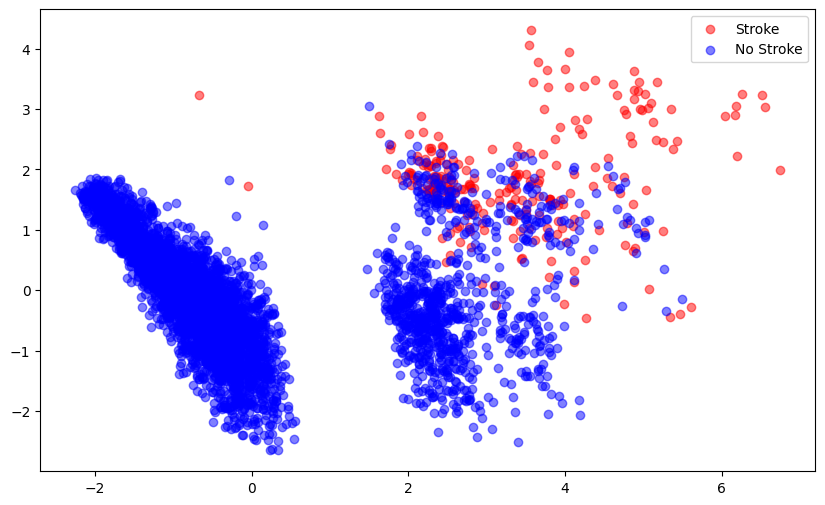

In [ ]:
# Create a figure and axis object
plt.figure(figsize=(10, 6))

# First scatter plot
plt.scatter(X_pca[data_df['stroke']==1][:,0], X_pca[data_df['stroke']==1][:,1], color='red', label='Stroke', alpha=0.5)

# Second scatter plot
plt.scatter(X_pca[data_df['stroke']==0][:,0], X_pca[data_df['stroke']==0][:,1], color='blue', label='No Stroke', alpha=0.5)
plt.legend()

cluster_means = data_df.groupby('Cluster')[features_for_clustering].mean()
print(cluster_means)

**Clustering including categorical features**

In [ ]:
# Select categorical columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Encode categorical variables
data_encoded = pd.get_dummies(data_df, columns=cat_cols)

# Convert numerical columns to float
data_encoded[['age', 'avg_glucose_level', 'bmi']] = data_encoded[['age', 'avg_glucose_level', 'bmi']].astype(float)

# Choose the number of clusters
num_clusters = 3

# Initialize the k-prototypes algorithm
kproto = KPrototypes(n_clusters=num_clusters, init='Cao')

# Fit the model
clusters = kproto.fit_predict(data_encoded, categorical=list(range(6, data_encoded.shape[1])))

centroids = kproto.cluster_centroids_

pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(data_encoded)

               age  hypertension  heart_disease  avg_glucose_level        bmi  \
Cluster                                                                         
0        20.381892      0.012716       0.001526          91.220880  25.581078   
1        58.404504      0.123863       0.072326          88.653421  29.944781   
2        58.565892      0.237960       0.148725         203.489915  31.890227   

           stroke  Cluster  gender_Female  gender_Male  ever_married_No  ...  \
Cluster                                                                  ...   
0        0.003052      0.0       0.589522     0.410478         0.708037  ...   
1        0.066262      1.0       0.596362     0.403638         0.092681  ...   
2        0.126062      2.0       0.525496     0.474504         0.134561  ...   

         work_type_Govt_job  work_type_Private  work_type_Self-employed  \
Cluster                                                                   
0                  0.072228           0.547

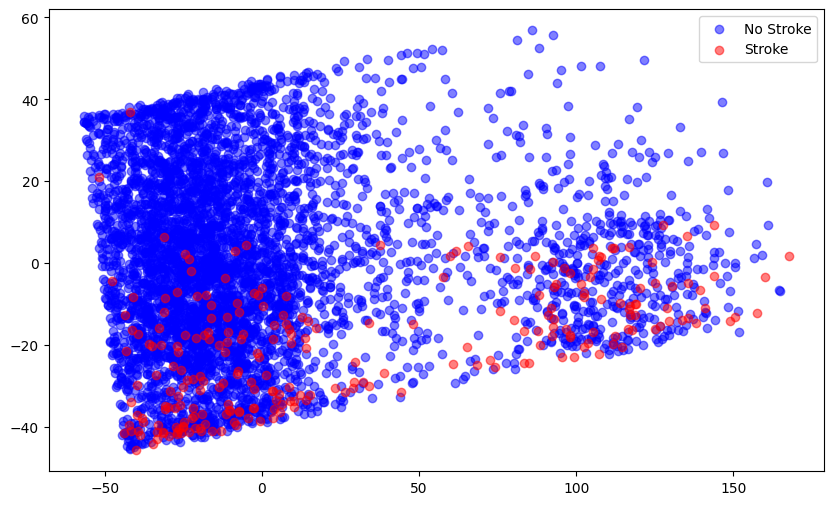

In [ ]:
# Add cluster labels to the original dataframe
data_encoded['Cluster'] = clusters

# Create a figure and axis object
plt.figure(figsize=(10, 6))

cluster_labels = kproto.labels_

# First scatter plot
plt.scatter(X_pca1[data_df['stroke']==0][:,0], X_pca1[data_df['stroke']==0][:,1], color='blue', label='No Stroke', alpha=0.5)

# Second scatter plot
plt.scatter(X_pca1[data_df['stroke']==1][:,0], X_pca1[data_df['stroke']==1][:,1], color='red', label='Stroke', alpha=0.5)
plt.legend()

cluster_means = data_encoded.groupby('Cluster')[data_encoded.columns].mean()
print(cluster_means)

# **Classification**

**Random Forest Classification**

In [11]:
# Define categorical and numerical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
target_feature = 'stroke'

# Define preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(data_df.drop(target_feature, axis=1), data_df[target_feature])

# Split the resampled data into features and target
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the classifier
clf_randomF = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=10))])

# Train the classifier
clf_randomF.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf_randomF.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get feature importance
feature_importance = clf_randomF.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
feature_names = (numerical_features +
                 list(clf_randomF.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

# Get feature importance with feature names
feature_importance_with_names = dict(zip(feature_names, feature_importance))

# Combine feature names and importance values into a DataFrame
df_feature_importance = pd.DataFrame(feature_importance_with_names.items(), columns=['Feature', 'Importance'])

# Function to extract category from feature name
def extract_category(feature_name):
    if 'gender' in feature_name:
        return 'Gender'
    elif 'ever_married' in feature_name:
        return 'Ever_Married'
    elif 'work_type' in feature_name:
        return 'Work_Type'
    elif 'Residence_type' in feature_name:
        return 'Residence_Type'
    elif 'smoking_status' in feature_name:
        return 'Smoking_Status'
    else:
        return feature_name

# Add a column for categories
df_feature_importance['Category'] = df_feature_importance['Feature'].apply(extract_category)

# Group by categories and calculate the sum of importance values
grouped_importance = df_feature_importance.groupby('Category')['Importance'].sum()

print("\nSum of feature importance grouped by different categories:")
print(grouped_importance)

Accuracy: 0.9904963041182682

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       946
           1       0.98      1.00      0.99       948

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894


Confusion Matrix:
[[928  18]
 [  0 948]]

Sum of feature importance grouped by different categories:
Category
Ever_Married         0.045939
Gender               0.024311
Residence_Type       0.035349
Smoking_Status       0.057870
Work_Type            0.048561
age                  0.359019
avg_glucose_level    0.208500
bmi                  0.167232
heart_disease        0.019941
hypertension         0.033277
Name: Importance, dtype: float64


In [ ]:
print("Training data:")
print(X_train)
print(y_train)

print("\nTest data:")
print(X_test)
print(y_test)

Training data:
      gender   age  hypertension  heart_disease ever_married      work_type  \
472     Male  72.0             1              0          Yes  Self-employed   
4123  Female   7.0             0              0           No       children   
9103    Male  68.0             0              0          Yes  Self-employed   
4091  Female  41.0             0              0          Yes        Private   
5391    Male  71.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5734  Female  66.0             0              0          Yes  Self-employed   
5191    Male  80.0             0              1          Yes  Self-employed   
5390    Male  59.0             0              0          Yes        Private   
860   Female  57.0             0              0          Yes  Self-employed   
7270  Female  77.0             0              0           No        Private   

     Residence_type  avg_glucose_lev

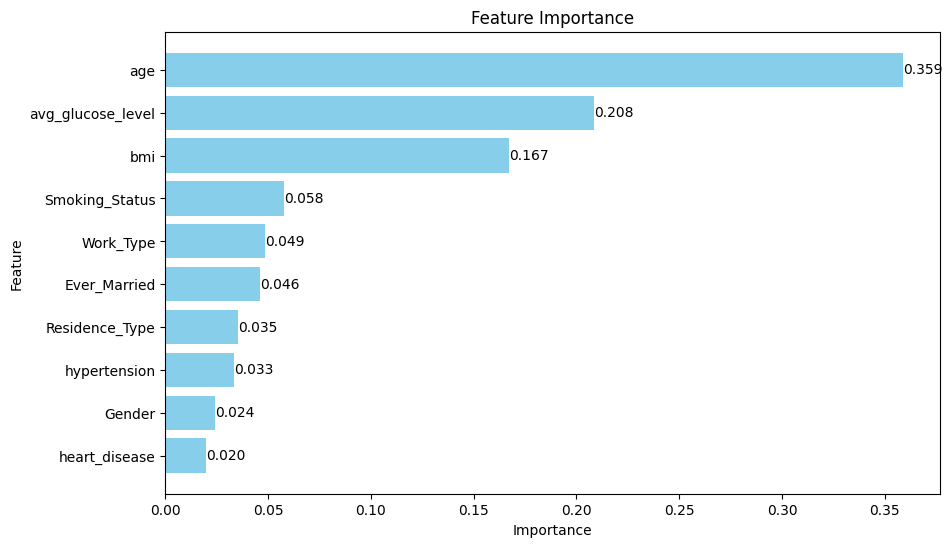

In [12]:
# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = sorted(grouped_importance.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance values from the sorted dictionary
features = [item[0] for item in sorted_feature_importance]
importance_values = [item[1] for item in sorted_feature_importance]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_values, color='skyblue')

# Annotate each bar with its importance value
for bar, importance in zip(bars, importance_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.3f}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

**Decision Tree Classification**

In [13]:
# Define categorical and numerical features
dt_categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
dt_numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
dt_target_feature = 'stroke'

# Define preprocessing steps
dt_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

dt_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

dt_preprocessor = ColumnTransformer(
    transformers=[
        ('num', dt_numerical_transformer, dt_numerical_features),
        ('cat', dt_categorical_transformer, dt_categorical_features)
    ])

# Oversample the minority class
dt_oversampler = RandomOverSampler(random_state=42)
dt_X_resampled, dt_y_resampled = oversampler.fit_resample(data_df.drop(dt_target_feature, axis=1), data_df[dt_target_feature])

# Split the resampled data into features and target
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X_resampled, dt_y_resampled, test_size=0.2, random_state=42)

# Define the classifier
decision_tree = DecisionTreeClassifier()
clf_decisionT = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', decision_tree)])

# Train the classifier
clf_decisionT.fit(dt_X_train, dt_y_train)

# Predict on the testing set
dt_y_pred = clf_decisionT.predict(dt_X_test)

# Evaluate the model
dt_accuracy = accuracy_score(dt_y_test, dt_y_pred)
print("Accuracy:", dt_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(dt_y_test, dt_y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(dt_y_test, dt_y_pred))

# Get feature importance
dt_feature_importance = clf_decisionT.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
dt_feature_names = (dt_numerical_features +
                 list(clf_decisionT.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(dt_categorical_features)))

# Get feature importance with feature names
dt_feature_importance_with_names = dict(zip(dt_feature_names, dt_feature_importance))

# Combine feature names and importance values into a DataFrame
dt_df_feature_importance = pd.DataFrame(dt_feature_importance_with_names.items(), columns=['Feature', 'Importance'])

# Function to extract category from feature name
def extract_category(feature_name):
    if 'gender' in feature_name:
        return 'Gender'
    elif 'ever_married' in feature_name:
        return 'Ever_Married'
    elif 'work_type' in feature_name:
        return 'Work_Type'
    elif 'Residence_type' in feature_name:
        return 'Residence_Type'
    elif 'smoking_status' in feature_name:
        return 'Smoking_Status'
    else:
        return feature_name

# Add a column for categories
dt_df_feature_importance['Category'] = dt_df_feature_importance['Feature'].apply(extract_category)

# Group by categories and calculate the sum of importance values
dt_grouped_importance = dt_df_feature_importance.groupby('Category')['Importance'].sum()

print("\nSum of feature importance grouped by different categories:")
print(dt_grouped_importance)

Accuracy: 0.9788806758183738

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       946
           1       0.96      1.00      0.98       948

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894


Confusion Matrix:
[[906  40]
 [  0 948]]

Sum of feature importance grouped by different categories:
Category
Ever_Married         0.007640
Gender               0.019387
Residence_Type       0.007603
Smoking_Status       0.043295
Work_Type            0.021209
age                  0.457123
avg_glucose_level    0.272098
bmi                  0.151296
heart_disease        0.008950
hypertension         0.011401
Name: Importance, dtype: float64


In [ ]:
print("Training data:")
print(dt_X_train)
print(dt_y_train)

print("\nTest data:")
print(dt_X_test)
print(dt_y_test)

Training data:
      gender   age  hypertension  heart_disease ever_married      work_type  \
472     Male  72.0             1              0          Yes  Self-employed   
4123  Female   7.0             0              0           No       children   
9103    Male  68.0             0              0          Yes  Self-employed   
4091  Female  41.0             0              0          Yes        Private   
5391    Male  71.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5734  Female  66.0             0              0          Yes  Self-employed   
5191    Male  80.0             0              1          Yes  Self-employed   
5390    Male  59.0             0              0          Yes        Private   
860   Female  57.0             0              0          Yes  Self-employed   
7270  Female  77.0             0              0           No        Private   

     Residence_type  avg_glucose_lev

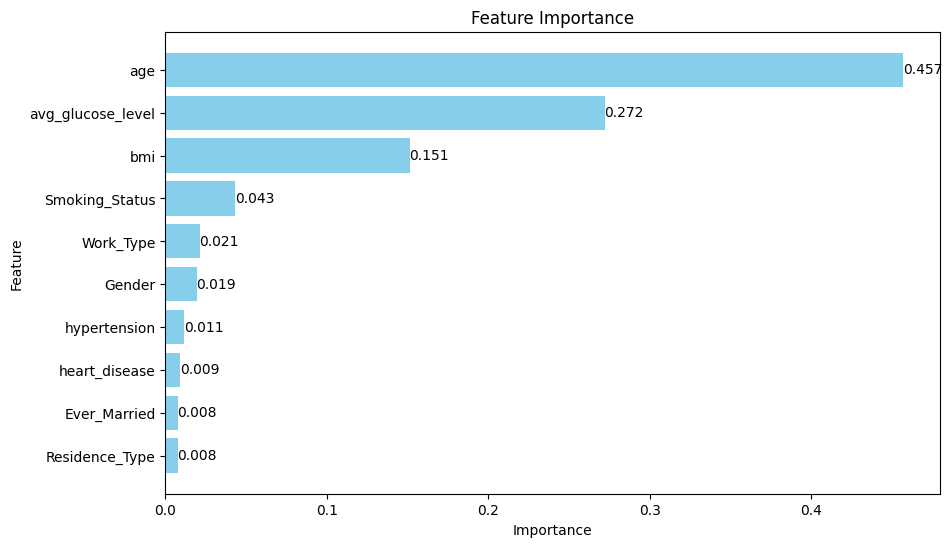

In [14]:
# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = sorted(dt_grouped_importance.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance values from the sorted dictionary
features = [item[0] for item in sorted_feature_importance]
importance_values = [item[1] for item in sorted_feature_importance]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_values, color='skyblue')

# Annotate each bar with its importance value
for bar, importance in zip(bars, importance_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.3f}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

**Predict stroke or not for user inputted data using Random Forest classification**

In [ ]:
# Collect user input
user_input = {
    'gender': 'Male',
    'age': 67,
    'hypertension': 0,
    'heart_disease': 1,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 225.69,
    'bmi': 30.6,
    'smoking_status': 'formerly smoked'
}

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])

# Make predictions
user_pred = clf_randomF.predict(user_df)

# Display prediction
if user_pred[0] == 1:
    print("The patient is predicted as stroke patient.")
else:
    print("The patient is predicted as non-stroke patient.")

The patient is predicted as stroke patient.
